### Import standard libraries.  Sklearn modules imported later

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [217]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [218]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Check out to see where our null values are

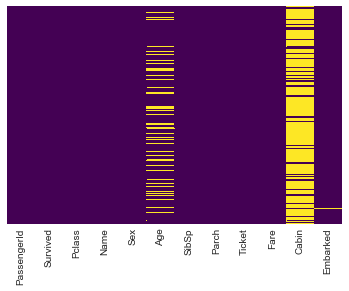

In [219]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [220]:
sns.set_style('whitegrid')

## Countplot of Survived broken down by Pclass

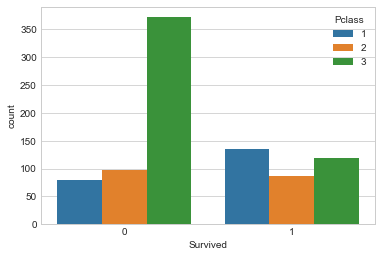

In [221]:
sns.countplot(x = 'Survived', data = train, hue = 'Pclass')

##  Age distribution plot dropping null values

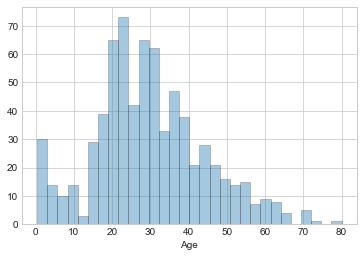

In [222]:
sns.distplot(train['Age'].dropna(), kde = False, bins = 30, hist_kws=dict(edgecolor="k", linewidth=.5))

## Count plot of Siblings/Spoouses with passenger

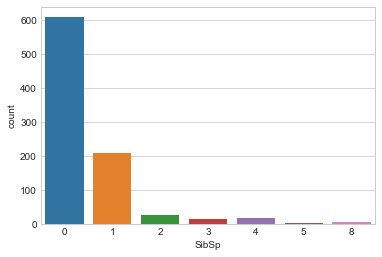

In [223]:
sns.countplot(x = 'SibSp', data = train)

## Pandas histogram of fare

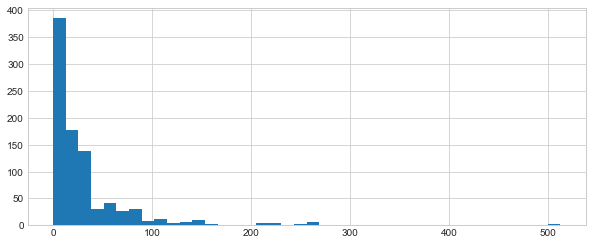

In [224]:
train['Fare'].hist(bins = 40, figsize = (10,4))

## Boxplot of Age broken down by Pclass

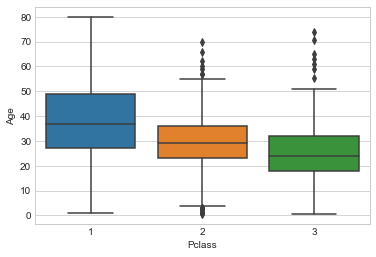

In [225]:
sns.boxplot(x = 'Pclass', y = 'Age', data = train)
plt.figure(figsize=(10, 7))

## Function to fill in null Age values based on mean Age and Pclass

In [226]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

impute_age is applied to train data

In [227]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

In [228]:
train.drop('Cabin', axis = 1, inplace = True)

Only one null value remains.  It is in the Embarked column

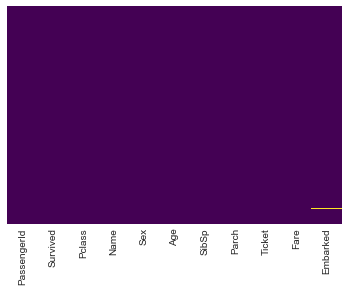

In [229]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

drop last null value

In [230]:
train.dropna(inplace = True)

## Assign dummy values to relevant categorical data

In [232]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)
pclass = pd.get_dummies(train['Pclass'], drop_first = True)
train = pd.concat([train, sex, embark, pclass], axis = 1)

In [233]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


Drop the columns that we now have dummy values for.

In [234]:
train_pid = list(train['PassengerId'])
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Pclass', 'PassengerId'], axis = 1, inplace = True)

## Complete data cleaning process for test data

In [235]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis = 1)
test.drop('Cabin', axis = 1, inplace = True)
test.dropna(inplace = True)
sex = pd.get_dummies(test['Sex'], drop_first = True)
embark = pd.get_dummies(test['Embarked'], drop_first = True)
pclass = pd.get_dummies(test['Pclass'], drop_first = True)
test = pd.concat([test, sex, embark, pclass], axis = 1)
test_pid = list(test['PassengerId'])
test.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Pclass', 'PassengerId'], axis = 1, inplace = True)

In [236]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [237]:
test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [238]:
from sklearn.model_selection import train_test_split

### Split data into X and Y training samples

In [239]:
X_train = train.drop('Survived',axis=1)
y_train = train['Survived']

In [240]:
from sklearn.tree import DecisionTreeClassifier

In [241]:
dtree = DecisionTreeClassifier()

Fit data to Decision Tree model

In [242]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### predict values with decision tree model

In [261]:
dt_pred = list(dtree.predict(X_test))

In [262]:
from sklearn.ensemble import RandomForestClassifier

## Repeat prediction of values.  This time with Random Forest data model.

In [263]:
rfc = RandomForestClassifier(n_estimators=200)

fit data to random forest model

In [264]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Predict values with Random Forest model

In [265]:
rf_pred = list(rfc.predict(X_test))

### Zip the two lists together to associate PassengerId and Survived

In [274]:
dt_output = dict(zip(test_pid,dt_pred))
rf_output = dict(zip(test_pid,rf_pred))

### Load the dictionaries into data frames to be output to csv in correct format

In [281]:
dtdf = pd.DataFrame(index = [0]).from_dict(dt_output, orient = 'index').reset_index()
dtdf.columns = ['PassengerId', 'Survived']
idtdf = dtdf.set_index('PassengerId')

rfdf = pd.DataFrame(index = [0]).from_dict(rf_output, orient = 'index').reset_index()
rfdf.columns = ['PassengerId', 'Survived']
irfdf = rfdf.set_index('PassengerId')

### Save files to csv in cwd

In [284]:
idtdf.to_csv('dec_tree_pred.csv', sep = ',')
irfdf.to_csv('ran_forest_pred.csv', sep = ',')